<a href="https://colab.research.google.com/github/luthf-ai/seni_komputer/blob/main/week06/week06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modul 6 - Histogram, Histogram Equalization, Dithering
##Kelompok:
####- Aido Lutfhi AL Hakim | 2141720136
####- Jauhar Maulana A'la | 2141720186
####- Naufal Falah Wafiuddin | 2141720129
Link Github : https://github.com/luthf-ai/seni_komputer

###1. Akses ke Google Drive

###2. Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

###3. Histogram Citra - Lenna.jpg

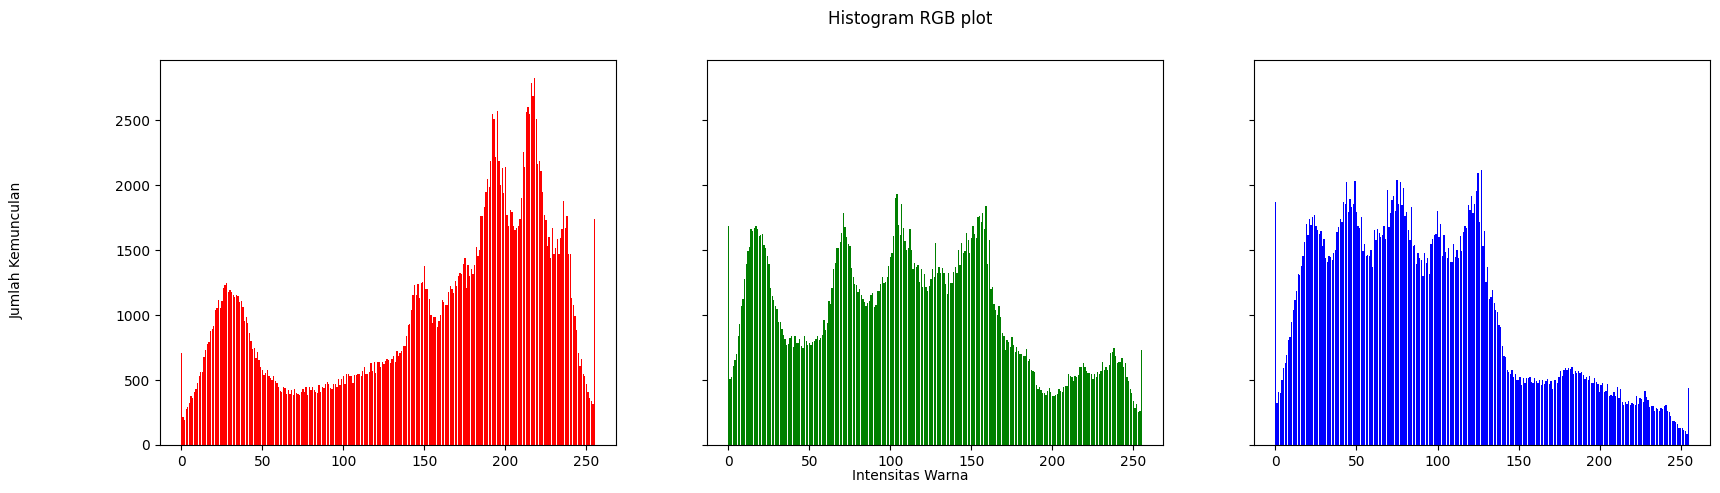

In [4]:
# Baca gambar Lena
img_1 = cv.imread('/content/drive/MyDrive/PCVK/lenna.jpeg')
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

height, width, _ = img_1.shape  # Menggunakan "_" untuk mengabaikan kedalaman warna

blue = [0] * 256
green = [0] * 256
red = [0] * 256

for y in range(height):
    for x in range(width):
        blue[img_1[y, x, 0]] += 1
        green[img_1[y, x, 1]] += 1
        red[img_1[y, x, 2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

plt.show()

###4. Histogram Citra - Lenna dengan library Numpy

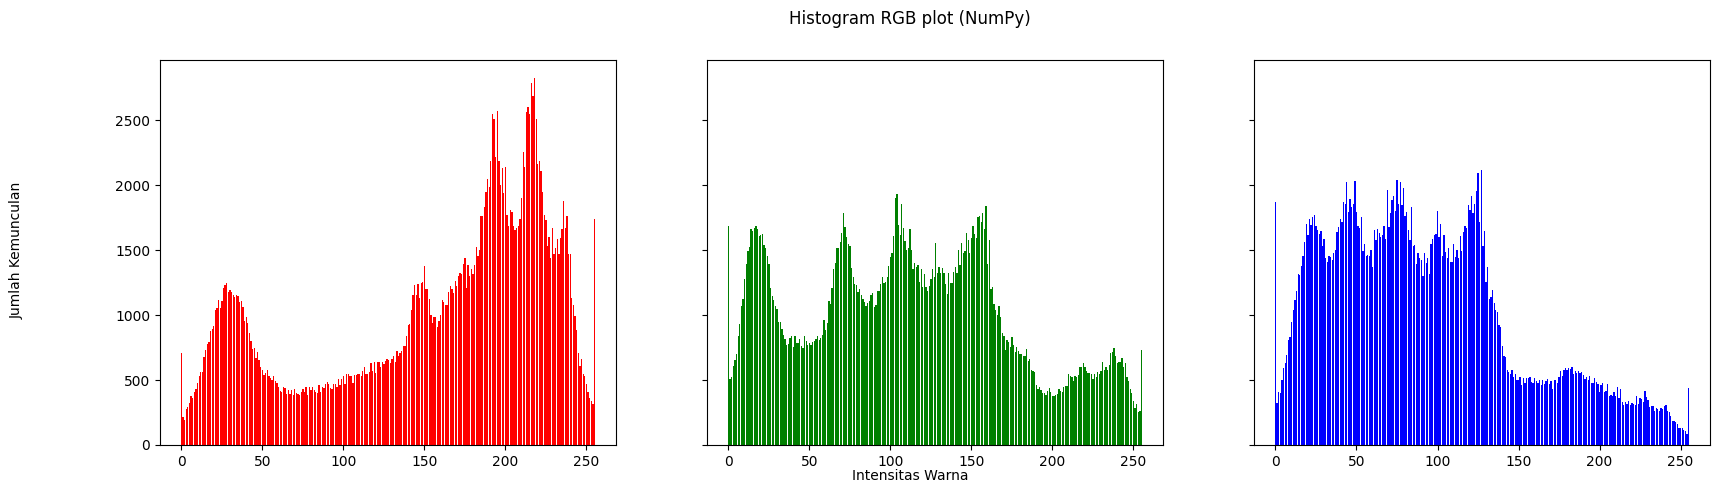

In [5]:
# Hitung histogram dengan NumPy
hist_blue, _ = np.histogram(img_1[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(img_1[:, :, 1], bins=256, range=(0, 256))
hist_red, _ = np.histogram(img_1[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, hist_red, color='red')
axs[1].bar(names, hist_green, color='green')
axs[2].bar(names, hist_blue, color='blue')

plt.show()

Hasil dari kedua histogram sama

###5. Histogram Equalization - Lena_lc.jpg

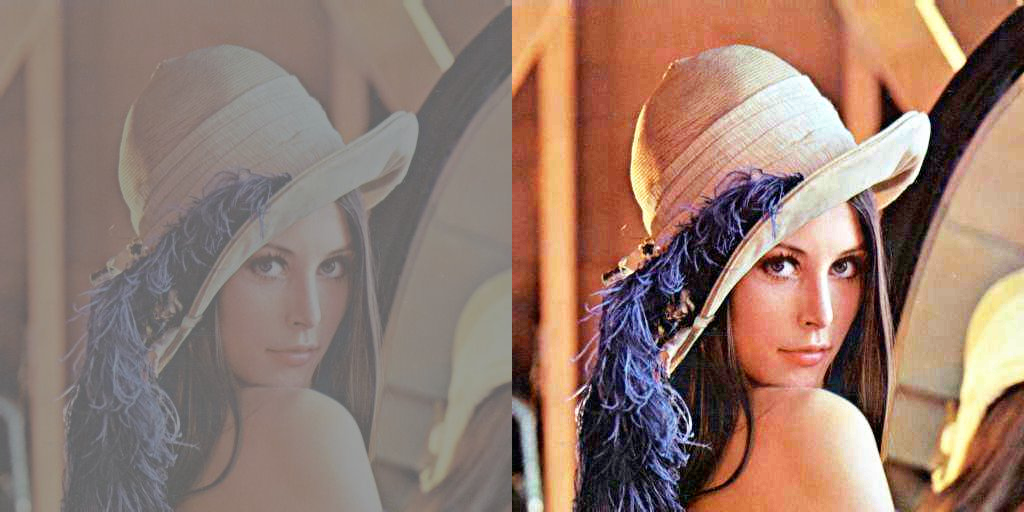

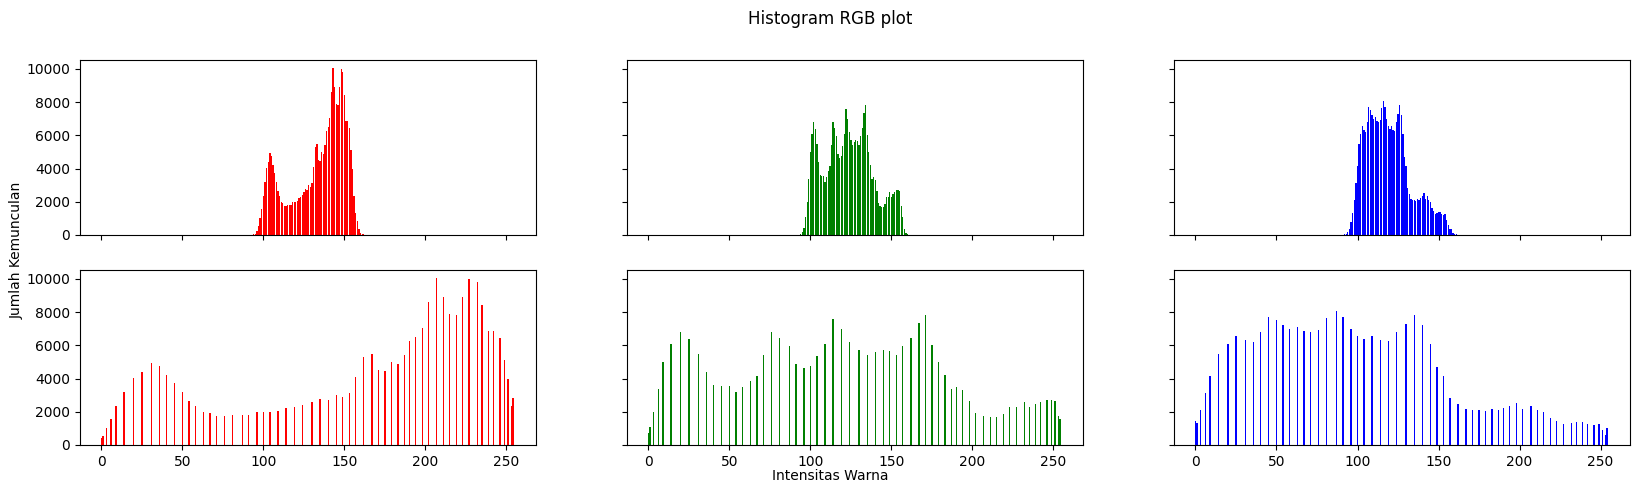

In [15]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/lenna2.jpeg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

###6. Histogram Equalization dengan library CV2

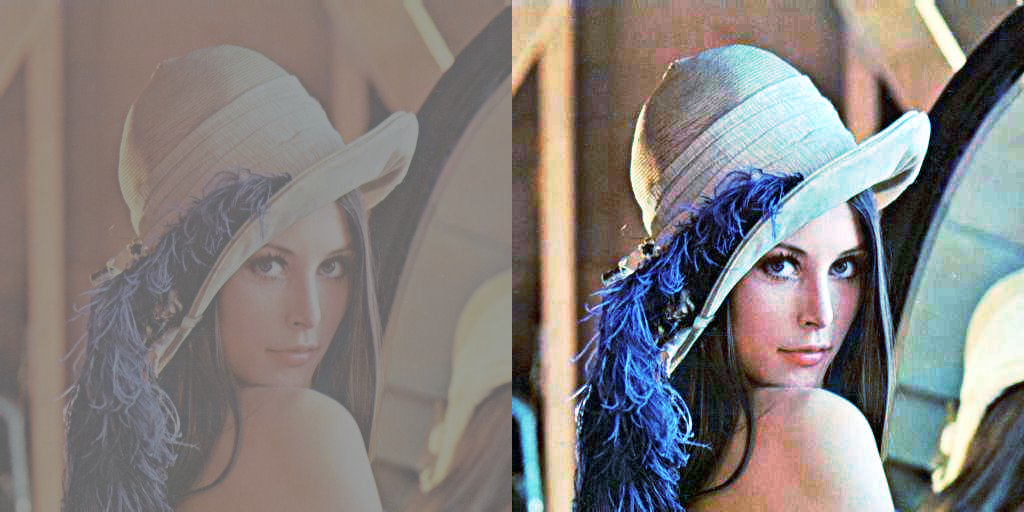

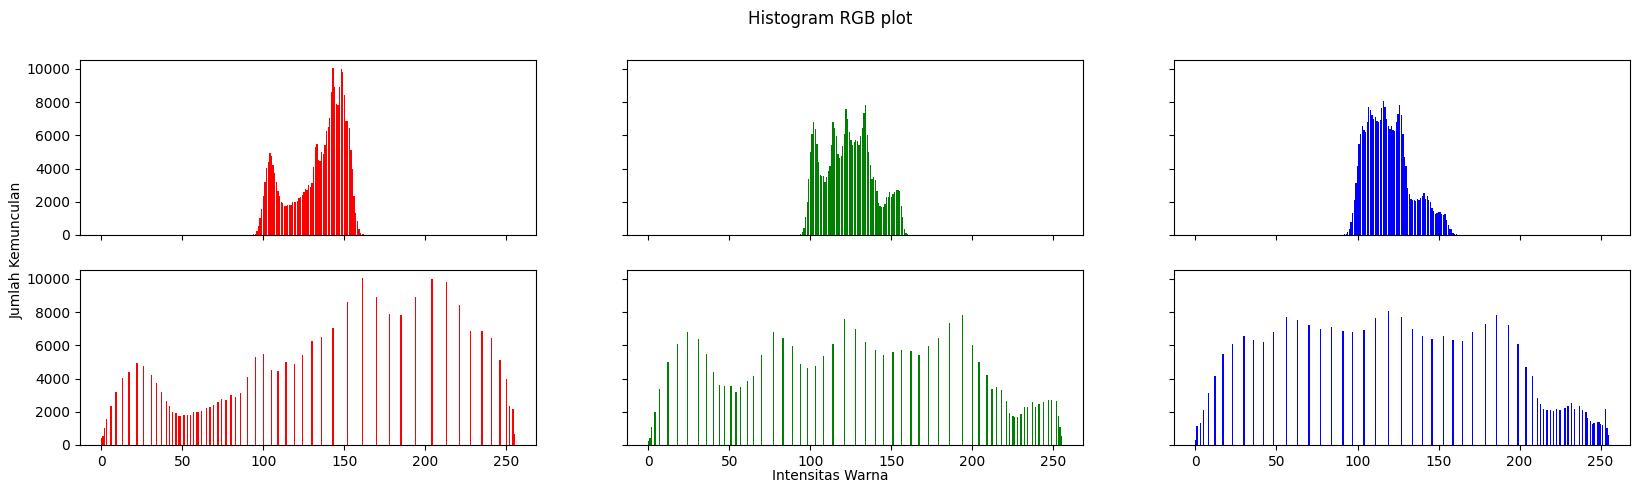

In [18]:
# Baca gambar Lena
img1 = cv.imread('/content/drive/MyDrive/PCVK/lenna2.jpeg')


# Fungsi untuk menghitung histogram
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1
            ax[1][img[y][x][1]] += 1
            ax[2][img[y][x][2]] += 1
    return ax

# Hitung histogram citra asli
histo_asli = histog(img1)

# Lakukan Histogram Equalization pada masing-masing saluran warna
equalized_channels = [cv.equalizeHist(img1[:, :, i]) for i in range(3)]

# Gabungkan saluran warna yang telah diekualisasi
img2 = cv.merge(equalized_channels)

# Hitung histogram citra hasil equalization
equal_histo = histog(img2)

# Menampilkan gambar sebelum dan sesudah proses Histogram Equalization
final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

Hasil kedua histogram dengan library yang berbeda menghasilkan hasil yang berbeda pada kedua histogram, kesamaan dari kedua histogram terdapat pada histogram hijau

###7. Pemetaan 16 juta warna RGB ke dalam 8 warna

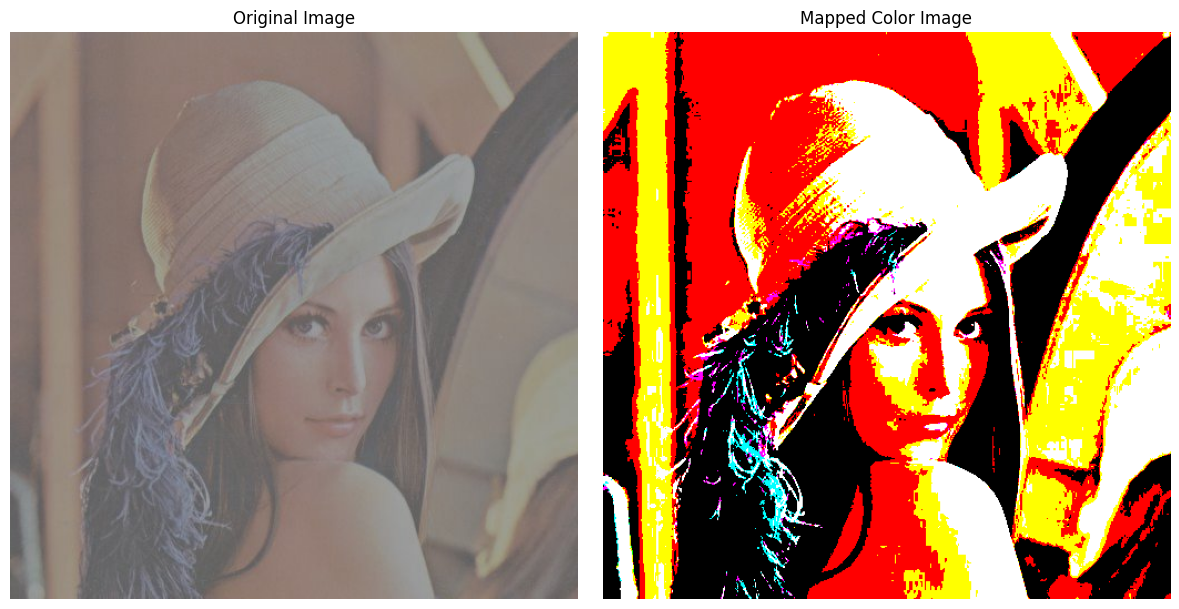

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Color palette
colors = {
    "Black": (0, 0, 0),
    "Green": (0, 255, 0),
    "Yellow": (255, 255, 0),
    "Blue": (0, 0, 255),
    "Cyan": (0, 255, 255),
    "Magenta": (255, 0, 255),
    "White": (255, 255, 255)
}

# Function to map a pixel to the nearest color
def map_to_nearest_color(pixel):
    min_dist = float('inf')
    nearest_color = None
    for color_name, color_value in colors.items():
        dist = np.linalg.norm(np.array(pixel) - np.array(color_value))
        if dist < min_dist:
            min_dist = dist
            nearest_color = color_name
    return colors[nearest_color]

# Load the image
image_path = '/content/drive/MyDrive/PCVK/lenna2.jpeg'
image = cv2.imread(image_path)

# Create a copy of the image and apply color mapping
mapped_image = np.apply_along_axis(map_to_nearest_color, -1, image)

# Convert the mapped image to the appropriate data type (8-bit, 3 channels)
mapped_image_uint8 = mapped_image.astype(np.uint8)

# Display the original and mapped images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(mapped_image_uint8, cv2.COLOR_BGR2RGB))
axes[1].set_title("Mapped Color Image")
axes[1].axis('off')
plt.tight_layout()
plt.show()



###8. Dithering Floyd and Steinberg

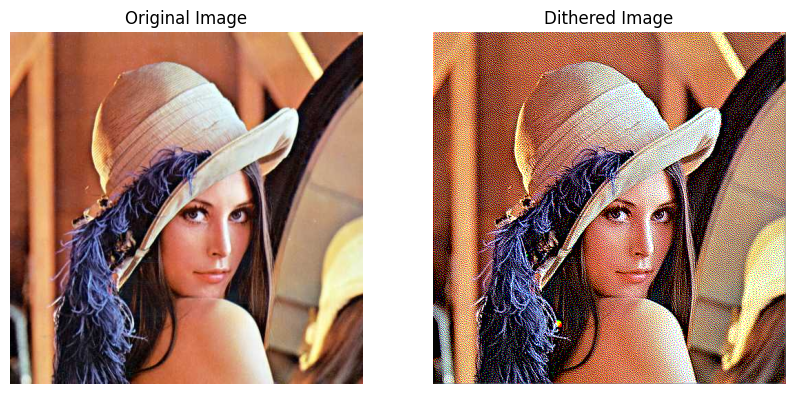

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hist_eq(im):
	clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
	cl1 = clahe.apply(im)
	return cl1
def set_pixel(im,x,y,new):
	im[x,y]=new

def stucki(im):   # stucki algorithm for image dithering
	w8= 8/42.0;
	w7=7/42.0;
	w5=5/42.0;
	w4= 4/42.0;
	w2=2/42.0;
	w1=1/42.0;
	width,height=im.shape
	for y in range(0,height-2):
		for x in range(0,width-2):
			old_pixel=im[x,y]
			if old_pixel<127:
				new_pixel=0
			else:
				new_pixel=255
			set_pixel(im,x,y,new_pixel)
			quant_err=old_pixel-new_pixel
			set_pixel(im,x+1,y, im[x+1,y] + w7 * quant_err);
			set_pixel(im,x+2,y, im[x+2,y]+ w5 * quant_err);
			set_pixel(im,x-2,y+1, im[x-2,y+1] + w2 * quant_err);
			set_pixel(im,x-1,y+1, im[x-1,y+1] + w4 * quant_err);
			set_pixel(im,x,y+1, im[x,y+1] + w8 * quant_err);
			set_pixel(im,x+1,y+1, im[x+1,y+1] + w4 * quant_err);
			set_pixel(im,x+2,y+1, im[x+2,y+1] + w2 * quant_err);
			set_pixel(im,x-2,y+2, im[x-2,y+2] + w1 * quant_err);
			set_pixel(im,x-1,y+2, im[x-1,y+2] + w2 * quant_err);
			set_pixel(im,x,y+2, im[x,y+2] + w4 * quant_err);
			set_pixel(im,x+1,y+2, im[x+1,y+2] + w2 * quant_err);
			set_pixel(im,x+2,y+2, im[x+2,y+2]+ w1 * quant_err);
	return im


def quantize(im):  # Floyd-Steinberg METHOD of image dithering
	for y in range(0,height-1):
		for x in range(1,width-1):
			old_pixel=im[x,y]
			if old_pixel<127:
				new_pixel=0
			else:
				new_pixel=255
			set_pixel(im,x,y,new_pixel)
			quant_err=old_pixel-new_pixel
			set_pixel(im,x+1,y,im[x+1,y]+quant_err*w1)
			set_pixel(im,x-1,y+1, im[x-1,y+1] +  quant_err*w2 )
			set_pixel(im,x,y+1, im[x,y+1] +  quant_err * w3 )
			set_pixel(im,x+1,y+1, im[x+1,y+1] +  quant_err * w4 )


	return im

img=cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')   # add path to the image here

img2=img.copy()
width,height,z=img.shape
w1=7/16.0
w2=3/16.0
w3=5/16.0
w4=1/16.0

gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blue=img[:,:,0]  #taking the blue channel
blue=stucki(blue)   #sending it to stucki algorithm
blue=hist_eq(blue)   #histogram equalising the result  same applies for remaining channels below
green=img[:,:,1]
green=stucki(green)
green=hist_eq(green)
red=img[:,:,2]
red=stucki(red)
red=hist_eq(red)
image = cv2.merge((blue, green, red))  #merging the 3 color channels
gray1=hist_eq(gray)
gray1= stucki(gray1)
gray2= stucki(gray)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Dithered Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


###9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg

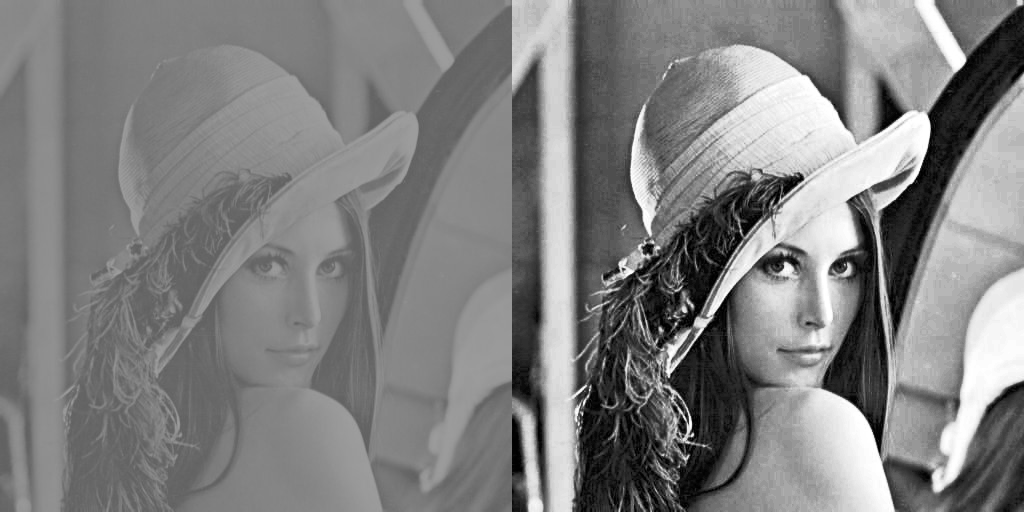

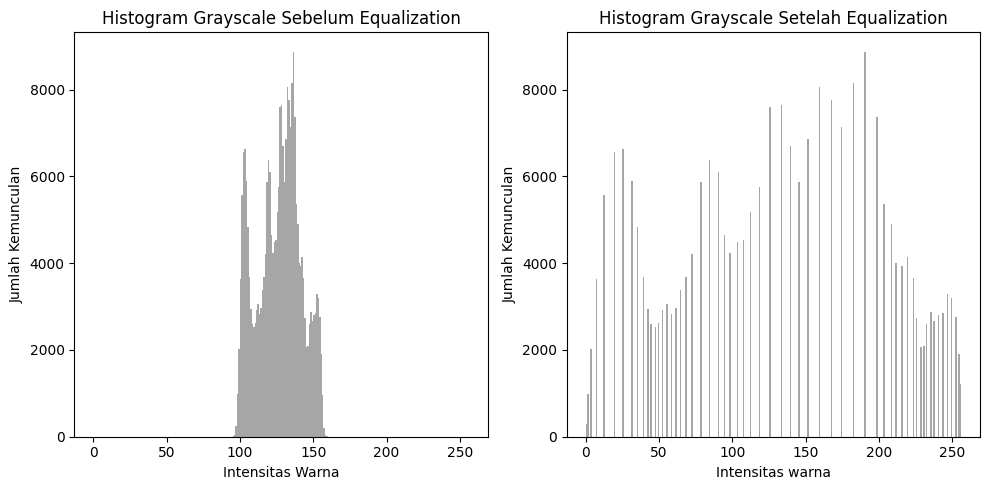

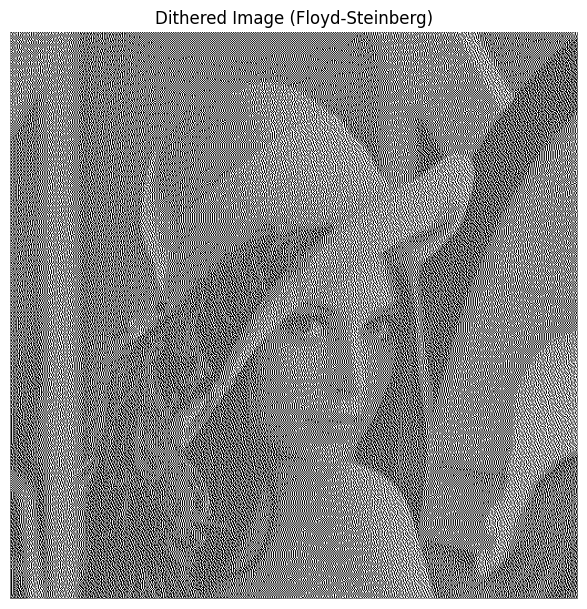

In [44]:
image_path = '/content/drive/MyDrive/PCVK/lena_lc.jpg'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
# Baca gambar dan ubah ke citra grayscale
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
# Plot histogram dari citra grayscale
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Terapkan histogram equalization
equalized_img = cv.equalizeHist(img)

# Plot histogram dari citra setelah equalization
plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
def floyd_steinberg_dithering(image):
    height, width = image.shape
    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = image[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            image[y, x] = new_pixel
            quantization_error = old_pixel - new_pixel

            # Floyd-Steinberg Dithering Formulas
            image[y, x + 1] = image[y, x + 1] + (7/16) * quantization_error
            image[y + 1, x - 1] = image[y + 1, x - 1] + (3/16) * quantization_error
            image[y + 1, x] = image[y + 1, x] + (5/16) * quantization_error
            image[y + 1, x + 1] = image[y + 1, x + 1] + (1/16) * quantization_error

    return image

dithered_image = floyd_steinberg_dithering(image.copy())

# Display the original and dithered images
plt.figure(figsize=(12, 6))

# Display the dithered image
final_frame = cv.hconcat((img, equalized_img))
cv2_imshow(final_frame)

plt.subplot(1, 2, 2)
plt.imshow(dithered_image, cmap='gray')
plt.title("Dithered Image (Floyd-Steinberg)")
plt.axis('off')

plt.tight_layout()
plt.show()